# EDA

**O objetivo desse projeto é realizar um EDA do banco de dados disponibilizado e também criar um modelo de machine learning que consiga realizar a previsão dos preços dos apartamentos.**

**As variáveis são:**

**id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo**

**nome - Representa o nome do anúncio**

**host_id - Representa o id do usuário que hospedou o anúncio**

**host_name – Contém o nome do usuário que hospedou o anúncio**

**bairro_group - Contém o nome do bairro onde o anúncio está localizado**

**bairro - Contém o nome da área onde o anúncio está localizado**

**latitude - Contém a latitude do local**

**longitude - Contém a longitude do local**

**room_type – Contém o tipo de espaço de cada anúncio**

**price - Contém o preço por noite em dólares listado pelo anfitrião**

**minimo_noites - Contém o número mínimo de noites que o usuário deve reservar**

**numero_de_reviews - Contém o número de comentários dados a cada listagem**

**ultima_review - Contém a data da última revisão dada à listagem**

**reviews_por_mes - Contém o número de avaliações fornecidas por mês**

**calculado_host_listings_count - Contém a quantidade de listagem por host**

**disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva**



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [2]:
warnings.filterwarnings('ignore')

In [3]:
dados_aluguel = pd.read_csv("teste_indicium_precificacao.csv")

## Observando o comportamento das variáveis do dataset

In [4]:
dados_aluguel.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


**Informações do dataset**

In [5]:
dados_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

**Quantidade de NaN's no dataset**

In [6]:
dados_aluguel.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

**É possível identificar alguns problemas com a base, algumas observações estão nulas, 16 para `nome`, 21 para o `host_name`, e 10052 para as variáveis `ultima_review` e `reviews_por_mes`. Sabendo disso, deve ser verificado cada uma das variáveis.**

## Tratamento das variáveis

**Ao realizar tratamento de variáveis, é necessário seguir alguns passos, pois, o banco de dados, caso possua dados faltantes ou erros, devem ser corrigidos, porém, essas correções devem ser feitas com cuidado, pois uma alteração no banco de dados pode levar a um viés no modelo final.**

### Variável `nome`

In [7]:
dados_aluguel[dados_aluguel["nome"].isna()]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
2853,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3702,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5774,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5974,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6268,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6566,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6604,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8840,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11962,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12823,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


**A variável `nome`, por ser qualitativa e única para cada observação, não possui relevância estatística. Portanto, deve ser substituída por algum valor ou removida do dataset. No entanto, removê-la não é a melhor opção, pois quanto mais dados o dataset possuir, mais preciso será o modelo de predição de preços. Assim, todos os valores `NaN` serão substituídos por `Outros`.**

In [8]:
dados_aluguel["nome"] = dados_aluguel["nome"].fillna(value = "Outros")

### Variável `host_name`

In [9]:
dados_aluguel[dados_aluguel["host_name"].isna()]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
359,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2699,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5744,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6074,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6581,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8162,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8256,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8851,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9137,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
9816,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


**O mesmo é válido para a coluna `host_name`, pois como é o nome do usuário que hospedou o anuncio as observações serão substituidas por `outros`.**

In [10]:
dados_aluguel["host_name"] = dados_aluguel["host_name"].fillna(value = "Outros")

### Variável `ultima_review` e `reviews_por_mes`

In [11]:
dados_aluguel[dados_aluguel["reviews_por_mes"].isna()]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
18,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
25,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
35,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
37,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


**As variáveis `reviews_por_mes` e `ultima_review` possívelmente foram digitadas incorretamente na criação do dataset, ou só não foi colocado nenhum valor, isso pode ser observado pela variável `numero_de_reviews`, pois quando ambas as variáveis são nulas, a variável `numero_de_reviews` é 0, porém, isso é uma hipótese, e deve ser verificada.**

**Verificando se existe algum valor `NaN` da variável `reviews_por_mes` caso a variável `numero_de_reviews` seja diferente de zero.**

In [12]:
dados_aluguel[(dados_aluguel["reviews_por_mes"].isna()) & (dados_aluguel["numero_de_reviews"] != 0)]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365


**Como foi confirmado acima, ambas as variáveis devem ter seus valores nulos substituidos por zero**

In [13]:
dados_aluguel["reviews_por_mes"] = dados_aluguel["reviews_por_mes"].fillna(value = 0)
dados_aluguel["ultima_review"] = dados_aluguel["ultima_review"].fillna(value = 0)

**Verificando agora se ainda possuem valores nulos**

In [14]:
dados_aluguel.isna().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

**Como todos os valores nulos do dataset foram removidos, deve-se verificar agora o comportamento de cada variável. As variáveis `id`, `nome`, `host_id` e `host_name` não poderão ser analisadas devido ao tipo de dado que representam. Como todas são observações únicas, sem seguir um padrão, não devem ser utilizadas por sua falta de relevância estatística e, em alguns casos, por questões de ética profissional.**

### Variável `bairro`

In [15]:
dados_aluguel["bairro"].unique()

array(['Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', 'Murray Hill',
       'Bedford-Stuyvesant', "Hell's Kitchen", 'Upper West Side',
       'Chinatown', 'South Slope', 'West Village', 'Williamsburg',
       'Fort Greene', 'Chelsea', 'Crown Heights', 'Park Slope',
       'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint',
       'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Astoria', 'Kensing

In [16]:
len(dados_aluguel["bairro"].unique())

221

**Como a variável `bairro` possui 221 níveis, não é recomendado a utilização dela para inferir algo, pois existe a possibilidade de gerar o problema de esparsidade e viesar o modelo final, então, o ideal é a utilização da variável `bairro_group` que é onde realmente é o bairro do apartamento.**

In [17]:
dados_aluguel["bairro_group"].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

**Essa variável possui 5 níveis, sendo melhor de visualizar o comportamento do banco de dados**

In [18]:
dados_aluguel["bairro_group"].value_counts()

bairro_group
Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribuição dos bairros')

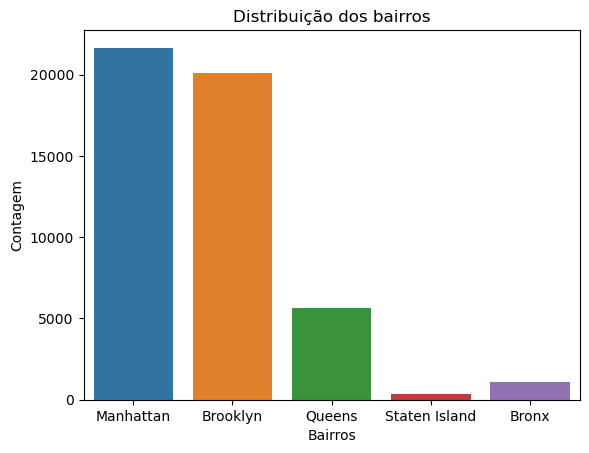

In [19]:
sns.countplot(data = dados_aluguel, x = "bairro_group")
plt.xlabel("Bairros")
plt.ylabel("Contagem")
plt.title("Distribuição dos bairros")

**É possível identificar que os bairros Manhattan e Brooklyn são os que possuem uma maior quantidade de apartamentos disponíveis para alugar.**

### Variável `room_type`

In [20]:
dados_aluguel["room_type"].value_counts()

room_type
Entire home/apt    25409
Private room       22325
Shared room         1160
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos dos quartos')

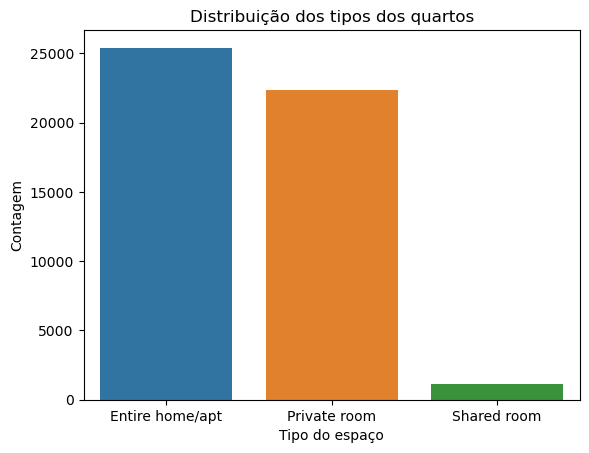

In [75]:
sns.countplot(data = dados_aluguel, x = "room_type")
plt.xlabel("Tipo do espaço")
plt.ylabel("Contagem")
plt.title("Distribuição dos tipos dos quartos")

**O tipo do espaço normalmente está anunciado como casa/apartamento completo e quarto privado, apenas algumas observações estão categorizadas como quarto compartilhado.**

## Variável `latitude` e `longitude`

<function matplotlib.pyplot.show(close=None, block=None)>

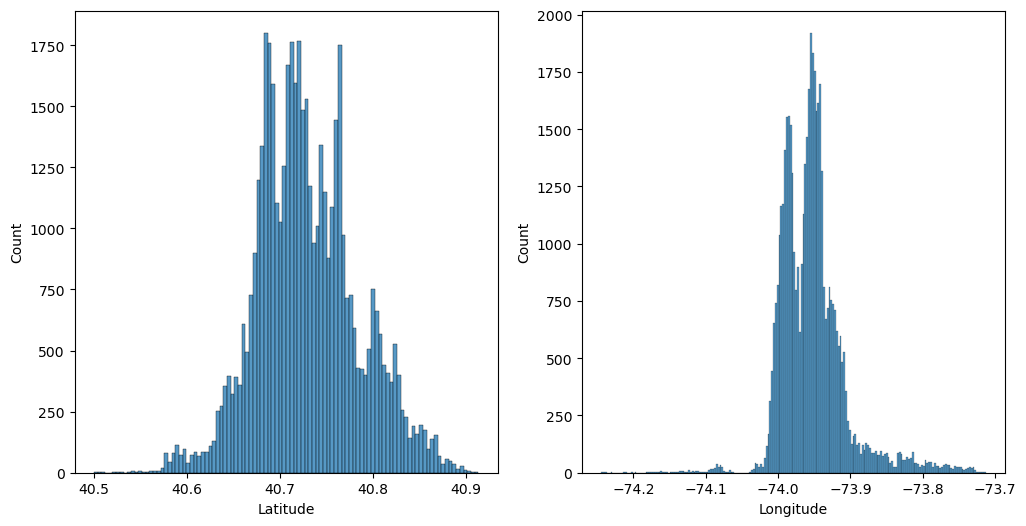

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.histplot(dados_aluguel["latitude"])
plt.xlabel("Latitude")
plt.subplot(1,2,2)
sns.histplot(dados_aluguel["longitude"])
plt.xlabel("Longitude")
plt.show

**Como ambas as variáveis apresentam um comportamento de uma distribuição normal, pode-se afirmar que a maior parte dos dados estão concentrados em uma única localidade/cidade ou em localidades próximas.**

### Variável `price`

**Essa variável, como trata-se do preço dos espaços, existir um 0 nessa variável pode indicar um possível erro, pois, não faz sentido alugar um espaço por 0 dólares, então isso deve ser verificado.**

In [23]:
dados_aluguel[dados_aluguel["price"] == 0].shape

(11, 16)

**O dataset possui 11 observações com preço de 0 dólares, sugerindo um possível erro de digitação do anfitrião na hora de disponibilizar o preço, nesse caso, para essas observações, o ideal é que sejam removidas do dataset ou inferido algum valor, seja a média ou mediana dos espaços ou a utilização de algumas técnicas estatísticas para a o cálculo do seu preço, no caso dessa análise, foi escolhido a remoção dessas observações, pois como são poucas a remoção delas não traria nenhum viés ao modelo final.**

In [24]:
dados_aluguel = dados_aluguel[dados_aluguel["price"] != 0]

Text(0.5, 0, 'Preço')

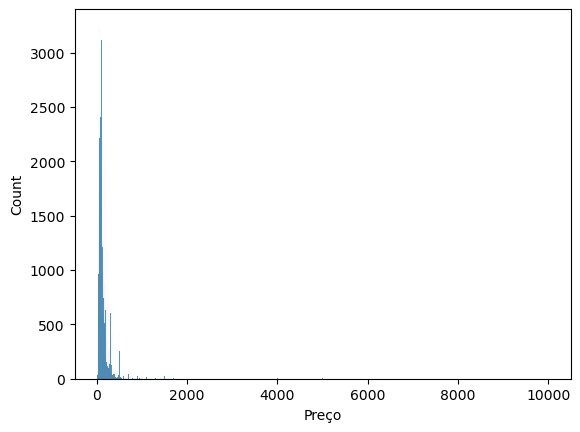

In [25]:
sns.histplot(dados_aluguel["price"])
plt.xlabel("Preço")

**Os preços dos espaços indica que muitos espaços possuem um preço baixo, enquanto poucos possuem preços elevados.**

### Variável `minimo_noites`

<Axes: xlabel='minimo_noites', ylabel='Count'>

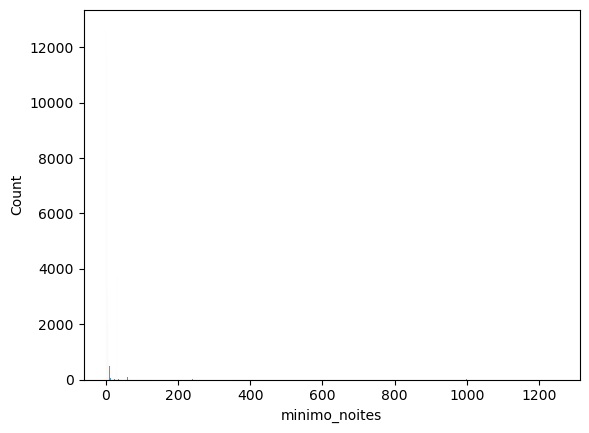

In [26]:
sns.histplot(dados_aluguel["minimo_noites"])

**Graficamente é possível observar um certo comportamento estranho com essa variável, em que aparenta ter uma concentração elevada em valores mais baixos e poucos valores mais altos, isso deve ser verificado.** 

In [27]:
dados_aluguel["minimo_noites"].describe()

count    48883.000000
mean         7.030010
std         20.512416
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimo_noites, dtype: float64

In [28]:
dados_aluguel[dados_aluguel["minimo_noites"] == 0].shape

(0, 16)

**Não possui valores zeros**

**Se considerarmos o valor máximo que alguém poderia colocar como mínimo de noites para uma reserva como sendo 366 dias (um ano), o banco de dados apresenta algumas observações com valores superiores a esse limite. O ideal e correto, nesse cenário, é entrar em contato com o setor de negócios que forneceu esse dataset para verificar se esses dados realmente estão corretos ou não. No meu caso, opto por remover essas observações, pois são poucas, e utilizarei apenas as que estão abaixo de 366 dias.**

In [29]:
dados_aluguel = dados_aluguel[dados_aluguel["minimo_noites"] <= 366]

**Criando novamente o histograma**

<Axes: xlabel='minimo_noites', ylabel='Count'>

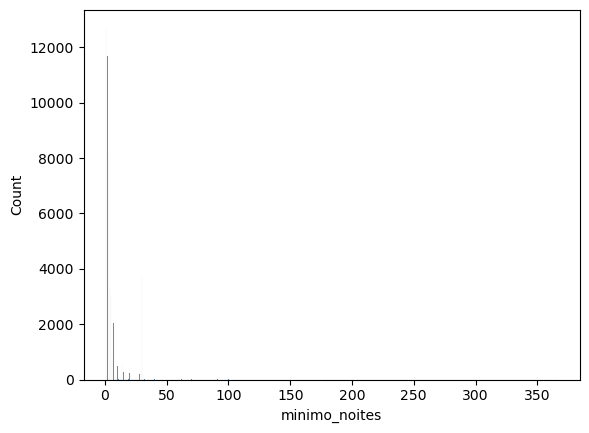

In [30]:
sns.histplot(dados_aluguel["minimo_noites"])

### Variável `numero_de_reviews`

<Axes: xlabel='numero_de_reviews', ylabel='Count'>

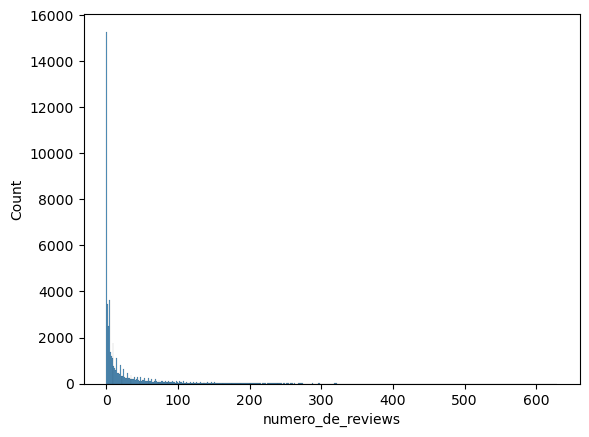

In [31]:
sns.histplot(dados_aluguel["numero_de_reviews"])

**A variável não aparenta possuir nenhum problema, então, permanecerá da forma que está.**

### Variável `ultima_review`

<Axes: xlabel='month'>

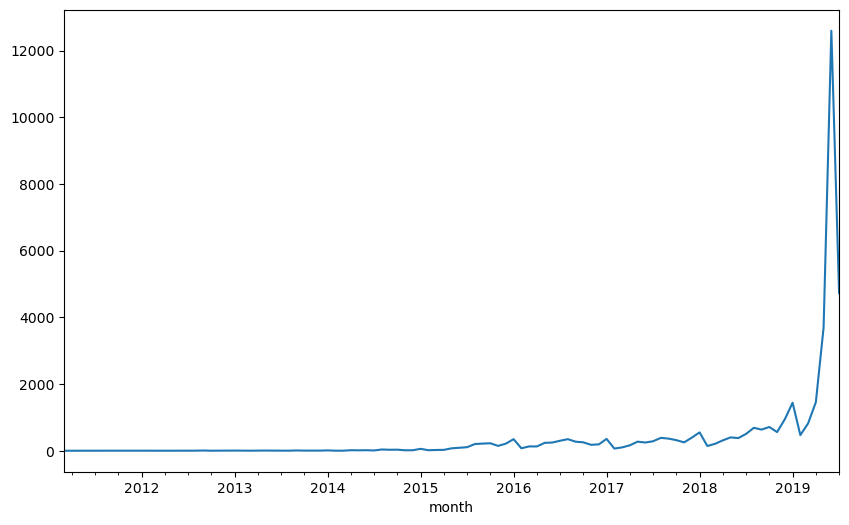

In [32]:
dados_filtrados = dados_aluguel.copy()
dados_filtrados = dados_aluguel[dados_aluguel["ultima_review"]!= 0]
dados_filtrados["ultima_review"] = pd.to_datetime(dados_filtrados["ultima_review"])
dados_filtrados['month'] = dados_filtrados['ultima_review'].dt.to_period('M')

plt.figure(figsize=(10,6))
dados_filtrados['month'].value_counts().sort_index().plot(kind='line')


**Através dessa variável é possível verificar que as reviews foram feitas durante o periodo de 2012 a 2019 com seu pico máximo de reviews por ano no ano de 2019.**

### Variável `calculado_host_listings_count`

<Axes: xlabel='calculado_host_listings_count', ylabel='Count'>

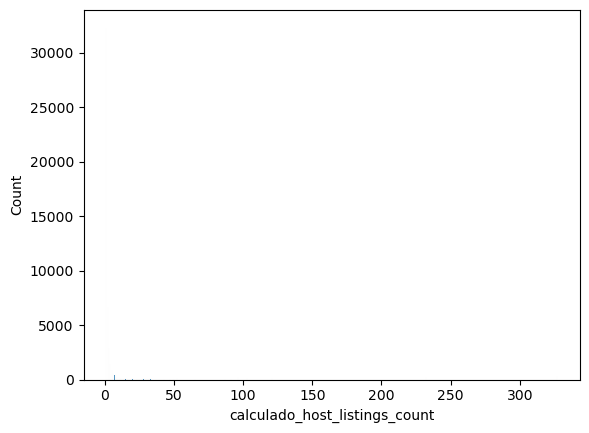

In [33]:
sns.histplot(dados_aluguel["calculado_host_listings_count"])

**Observando o comportamento dessa variável, ela aparenta um certo comportamento diferente, e deve ser verificado**

In [34]:
dados_aluguel["calculado_host_listings_count"].describe()

count    48870.000000
mean         7.146184
std         32.960764
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculado_host_listings_count, dtype: float64

In [35]:
dados_aluguel["calculado_host_listings_count"].unique()

array([  2,   1,   4,   3,   6,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32], dtype=int64)

In [36]:
dados_aluguel[dados_aluguel["calculado_host_listings_count"]>=200].shape

(559, 16)

**Cerca de 75% da base está entre valores 1 e 2, porém, apesar desses valores estranhos, os valores estão condizentes com a realidade, pois é possível que um host tenha diversos anuncios no aplicativo, então, essa variável permanecerá da forma que está.**

### Variável `disponibilidade_365`

<Axes: xlabel='disponibilidade_365', ylabel='Count'>

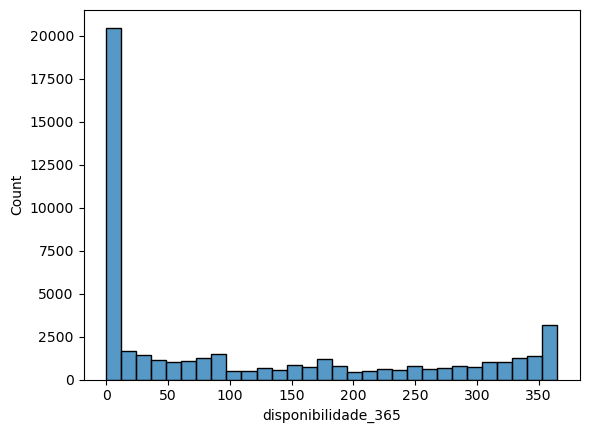

In [37]:
sns.histplot(dados_aluguel["disponibilidade_365"])

**Essa variável não apresenta nenhuma discrepância em seu valor e apresenta uma grande quantidade de valores zeros porém com uma distribuição que faz sentido para o dataset.**

------

**Agora, com a base tratada e verificada, podemos levantar algumas hipóteses.**

### Será que bairros mais populares possuem preços mais altos?

In [38]:
dados_aluguel.groupby("bairro_group").agg(media_preco=("price", "mean"), qtd_reviews=("numero_de_reviews", "sum"))

,media_preco,qtd_reviews
bairro_group,,
Bronx,87.577064,28316
Brooklyn,124.451016,486203
Manhattan,196.890464,454565
Queens,99.493997,156920
Staten Island,114.812332,11541


**De acordo com os dados, a quantidade de reviews pode sim estar correlacionada com os o preço médio dos aluguéis, e de acordo com a internet, o bairro de Manhattan é considerado o mais nobre dentre os 5, seguido pelo Brooklyn e Queens, já os bairros Staten Island e Bronx são considerados os que possuem os preços mais acessíveis, condizendo assim com as informações do banco de dados.**

### Qual o impacto do tipo do quarto no preço dos aluguéis?

In [39]:
dados_aluguel.groupby("room_type")["price"].mean()

room_type
Entire home/apt    211.824796
Private room        89.812539
Shared room         70.214347
Name: price, dtype: float64

**Pode-se verificar que quando é um quarto compartilhado, o preço tende a ser mais barato que um quarto privado, e quando é uma casa/apartamento completo o preço chega a triplicar, se comparado com o quarto compartilhado.**

### Quanto mais disponíbilidade tem, maior é a quantidade de avaliações? Quanto menor a disponibilidade, maior o preço?

**Essas duas perguntas podem ser respondidas de algumas maneiras, utilizarei a correlação e também um gráfico de dispersão para cada.**

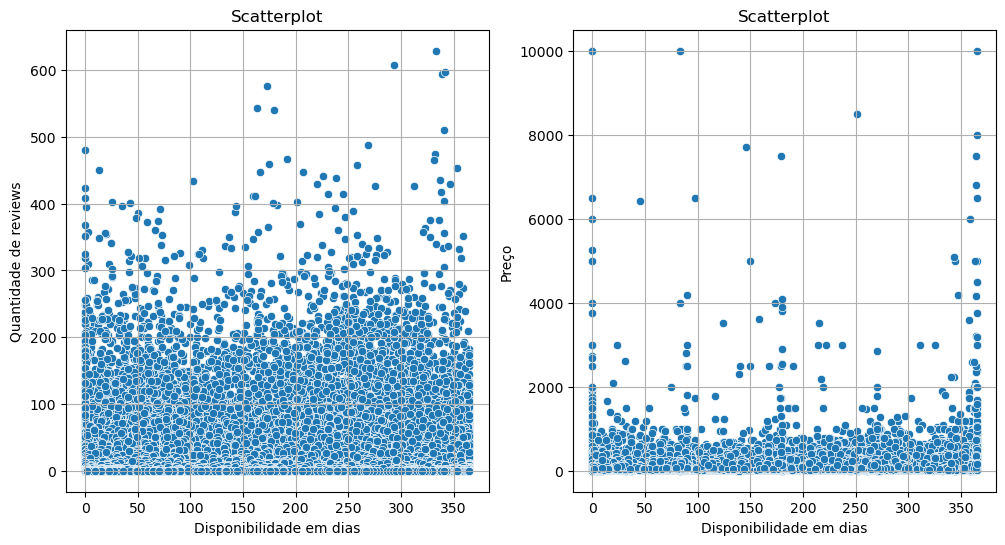

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.scatterplot(x = "disponibilidade_365", y = "numero_de_reviews", data = dados_aluguel)
plt.title("Scatterplot")
plt.xlabel("Disponibilidade em dias")
plt.ylabel("Quantidade de reviews")
plt.grid(True)

plt.subplot(1,2,2)
sns.scatterplot(x = "disponibilidade_365", y = "price", data = dados_aluguel)
plt.title("Scatterplot")
plt.xlabel("Disponibilidade em dias")
plt.ylabel("Preço")
plt.grid(True)

plt.show()

**Pelo gráfico de dispersão não é possível identificar muita coisa, porém, se for analisar com mais afinco é possível identificar uma certa quantidade crescente na quantidade de reviews quanto maior a disponibilidade de dias.**

**Já para o preço não é possível identificar nenhuma relação entre as variáveis, visto que a dispersão dos dados aparenta estar bastante aleatória.**

<Axes: >

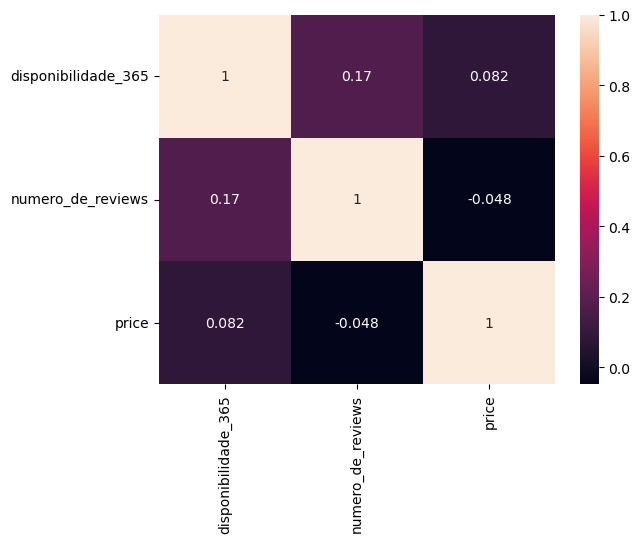

In [41]:
correlacao = dados_aluguel[["disponibilidade_365", "numero_de_reviews", "price"]].corr()
sns.heatmap(correlacao, annot=True)

**Apesar da correlação fraca entre as variáveis disponibilidade e número de reviews é uma correlação positiva, mas não significa que quanto mais dias o aluguel ficar disponível maiores serão as quantidades de reviews, já com relação a variável preço, ela indica que não há correlação entre as variáveis.**

### Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

**Como trata-se de um investimento, essa pergunta pode ser respondida de acordo com o preço dos apartamentos de cada bairro, em que o bairro que possua os maiores aluguéis e também a maior quantidade de reviews deve ser o local mais apropiado para ser feito esse investimento.**

In [42]:
dados_aluguel.groupby("bairro_group").agg(media_preco=("price", "mean"), qtd_reviews=("numero_de_reviews", "sum"))

,media_preco,qtd_reviews
bairro_group,,
Bronx,87.577064,28316
Brooklyn,124.451016,486203
Manhattan,196.890464,454565
Queens,99.493997,156920
Staten Island,114.812332,11541


**O bairro de Manhattan seria a melhor opção nesse caso, pois, apesar de ter a segunda maior quantidade de reviews, o bairro possui o maior preço médio, sendo cerca de 50% mais caro que o Brooklyn, bairro que possui a maior quantidade de reviews.**

### O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

**Essa pergunta pode ser respondida através a verificação da correlação dessas variáveis.**

<Axes: >

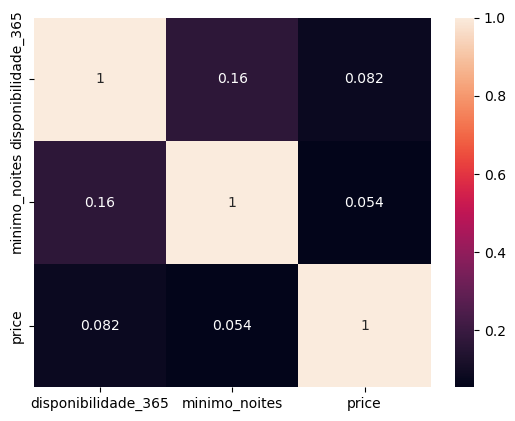

In [43]:
correlacao = dados_aluguel[["disponibilidade_365", "minimo_noites", "price"]].corr()
sns.heatmap(correlacao, annot=True)

**A correlação indica que não há nenhuma relação entre as variáveis, ou seja, a quantidade mínima de noites e a disponibilidade dos apartamentos no decorrer do ano não interferem nos preços.**

### Existe algum padrão no texto do nome do local para lugares de mais alto valor?

**Para responder essa pergunta temos que considerar algumas palavras chave para verificarmos se o preço é elevado devido essas determinadas palavras, algumas delas podem ser consideradas, como "beach" caso seja próximo de alguma praia, "luxury", pois é utilizado para descrever locais de luxo, "downtown" pois fica localizado próximo do centro da cidade.**

In [44]:
dados_com_palavras = dados_aluguel.copy()
dados_com_palavras["contém_downtown"] = dados_com_palavras["nome"].str.contains("downtown", case = False, na = False)
dados_com_palavras["contém_luxury"] = dados_com_palavras["nome"].str.contains("luxury", case=False, na=False)
dados_com_palavras["contém_beach"] = dados_com_palavras["nome"].str.contains("beach", case=False, na=False)

print(dados_com_palavras.groupby("contém_downtown")["price"].mean())
print(dados_com_palavras.groupby("contém_luxury")["price"].mean())
print(dados_com_palavras.groupby("contém_beach")["price"].mean())

contém_downtown
False    152.425247
True     193.813602
Name: price, dtype: float64
contém_luxury
False    148.433631
True     271.614444
Name: price, dtype: float64
contém_beach
False    152.750334
True     155.691892
Name: price, dtype: float64


**A partir dessas informações acima, pode-se concluir que, caso contenha "downtown" e "luxury" em seu nome, a média de preços cobrado é significativamente maior do que caso não contenham, já a palavra "beach" não obteve tanta diferença assim nos preços.** 

----

# Machine Learning

------

**O problema a ser resolvido é um problema de regressão, pois a variável que buscamos prever é numérica, se fosse para categorizar algo, seria um problema de classificação, os modelos mais conhecidos para resolver esse tipo de problema são Random Forest e Extreme Gradient Boosting.**

**O Random Forest, de maneira simplificada, parte do princípio de bagging, em que diversas árvores de decisão independentes são construídas e calcula-se a média das árvores para a criação do modelo.**

**Já o Extreme Gradient Boosting é uma variante do método Gradient Boosting, partindo do princípio de boosting, em que diversas árvores de decisão são construidas em sequência, cada uma corrigindo os erros da árvore anterior para melhorar a performance do modelo.**

**Agora será desenvolvido o modelo de machine learning para a previsão de preços a partir dos dados disponíveis. As variáveis utilizadas serão todas, exceto `id`, `nome`, `host_id`, `host_name`, `bairro` e `ultima_review`. As variáveis categóricas foram descartadas por possuírem muitos níveis e não apresentarem relevância estatística para o modelo. Já as variáveis numéricas, como `id` e `host_id`, não possuem variabilidade suficiente para contribuir com o desempenho do modelo. Além disso, parte dessas variáveis viola princípios éticos e de privacidade, o reforçando a decisão de não utilizá-las.**

In [45]:
dados_machine_learning = dados_aluguel.copy()

In [46]:
dados_machine_learning.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


**Os dados ainda apresentam um problema, para rodar modelos de machine learning, tudo deve ser numérico, as variáveis `bairro_group` e `room_type` devem ser transformadas em numéricas para conseguirmos criar o modelo.** 

In [47]:
dados_machine_learning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48870 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48870 non-null  int64  
 1   nome                           48870 non-null  object 
 2   host_id                        48870 non-null  int64  
 3   host_name                      48870 non-null  object 
 4   bairro_group                   48870 non-null  object 
 5   bairro                         48870 non-null  object 
 6   latitude                       48870 non-null  float64
 7   longitude                      48870 non-null  float64
 8   room_type                      48870 non-null  object 
 9   price                          48870 non-null  int64  
 10  minimo_noites                  48870 non-null  int64  
 11  numero_de_reviews              48870 non-null  int64  
 12  ultima_review                  48870 non-null  obje

In [48]:
dados_machine_learning["bairro_group"] = dados_machine_learning["bairro_group"].replace({
    'Bronx': '1',
    'Brooklyn': '2',
    'Manhattan': '3',
    'Queens': '4',
    'Staten Island': '5'}).astype(int)

dados_machine_learning["room_type"] = dados_machine_learning["room_type"].replace({
    'Entire home/apt': '1',
    'Private room': '2',
    'Shared room': '3'}).astype(int)

In [49]:
dados_machine_learning.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,3,Midtown,40.75362,-73.98377,1,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,3,Harlem,40.80902,-73.94190,2,150,3,0,0,0.00,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,2,Clinton Hill,40.68514,-73.95976,1,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,3,East Harlem,40.79851,-73.94399,1,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,3,Murray Hill,40.74767,-73.97500,1,200,3,74,2019-06-22,0.59,1,129


**A partir desses dados, agora pode-se começar a realização do modelo de machine learning, onde serão treinados dois modelos e verificados quais são os mais adequados para a realização da previsão de preços.**

------

## Random Forest

------

**O modelo Random Forest tem a vantagem de ser bastante robusto e não propenso a outliers, pois utiliza-se da média das previsões das árvores e também é um modelo eficiente com relação ao custo computacional, pois como as árvores são independentes, elas podem ser treinadas simultaneamente, porém, é um modelo que não captura muito bem relações muito complexas entre as variáveis.**

**Dividindo as bases em treino e teste**

In [50]:
ABT = dados_machine_learning.copy()
X = ABT.drop(columns=["price","id","nome","host_id","host_name","bairro","ultima_review"]) 
y = ABT["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=411, stratify=None)

**Verificando como ficou a média de preço nas 3 bases**

In [51]:
print("Média geral do preço:", dados_machine_learning["price"].mean())
print("Média dos preços no conjunto de treino:", y_train.mean())
print("Média dos preços no conjunto de teste:", y_test.mean())

Média geral do preço: 152.76146920401064
Média dos preços no conjunto de treino: 152.52654698242932
Média dos preços no conjunto de teste: 153.466197413652


**Tunando o modelo para identificar os melhores hiper-parâmetros**

In [52]:
rf_model = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

**Agora, buscando o modelo com os melhores hiper-parâmetros**

In [53]:
kfold = KFold(n_splits=5, shuffle=True, random_state=411)

grid_search = GridSearchCV(rf_model, param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=411, shuffle=True),
             error_score='raise', estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

**Métricas do modelo**

**As métricas do modelo escolhidas foram RMSE, MAE e R2 pois são as melhores medidas para avaliar um modelo em que a variável resposta é numérica (regressão).**

**RMSE = Root Mean Squared Error (Erro quadrático médio) - Mede a diferença entre os valores previstos e os reais.**

**MAE = Mean Absolute Error (Erro absoluto médio) - Mede o erro médio entre as previsões e os valores reais.**

**R2 = Coeficiente de determinação - Mede o quão bem o modelo explica a variabilidade dos dados.**

In [54]:
best_model_rf = grid_search.best_estimator_
y_pred = best_model_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics_rf = {
    'RMSE': rmse,
    'MAE': mae,
    'R2': r2
}

**Modelo final**

In [55]:
predict = pd.DataFrame({'Valores verdadeiros': y_test, 'Predito': y_pred})
X_all = ABT.drop(columns=['price',"id","nome","host_id","host_name","bairro","ultima_review"])
y_all = ABT['price']
final_model_rf = best_model_rf.fit(X_all, y_all)

In [56]:
predict

,Valores verdadeiros,Predito
25992,55,66.427083
25232,350,197.103004
10283,60,106.729271
2762,159,196.896523
35722,180,187.179117
...,...,...
12999,80,89.790010
41296,145,207.614606
25355,160,113.357592
43007,52,60.184809


-----

## XGBoost

----

**O modelo XGBoost tem a vantagem de ser altamente eficiente e apresentar um desempenho elevado, conseguindo capturar relações complexas entre as variáveis. No entanto, por ser um modelo robusto, ele é propenso ao overfitting caso não seja bem regularizado. Além disso, por ser um modelo mais complexo, possui um custo computacional maior em comparação ao Random Forest, pois segue o princípio do boosting.**

---

**Tunando o modelo para identificar os melhores hiper-parâmetros**

In [57]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2]
}

**Buscando os melhores hiperparâmetros**

In [58]:
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=411, shuffle=True),
             error_score='raise',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, impo...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [10, 50, 100, 200],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

**Avaliando as métricas do melhor modelo**

In [59]:
best_model_xgb = grid_search.best_estimator_
y_pred = best_model_xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics_xgb = {
    'RMSE': rmse,
    'MAE': mae,
    'R2': r2
}

In [60]:
predictions = pd.DataFrame({'Valores verdadeiros': y_test, 'Predições': y_pred})

X_all = ABT.drop(columns=['price',"id","nome","host_id","host_name","bairro","ultima_review"])
y_all = ABT['price']
final_model_xgb = best_model_xgb.fit(X_all, y_all)

In [61]:
predictions

,Valores verdadeiros,Predições
25992,55,75.156975
25232,350,201.617630
10283,60,110.899254
2762,159,251.832504
35722,180,165.286438
...,...,...
12999,80,80.082619
41296,145,252.090805
25355,160,121.107056
43007,52,77.941383


**Avaliando as métricas de cada modelo**

In [62]:
print(f'Métricas do modelo Random Forest: {metrics_rf}')
print(f'Métricas do modelo XGBoost: {metrics_xgb}')

Métricas do modelo Random Forest: {'RMSE': 219.8232916409083, 'MAE': 65.16793030911377, 'R2': 0.17494493496288888}
Métricas do modelo XGBoost: {'RMSE': 220.61500398321317, 'MAE': 65.99117065541462, 'R2': 0.16899122039278602}


**Como o modelo Random Forest apresentou métricas levemente superiores ao XGBoost, ele deve ser utilizado como o modelo preditor de preços, e também, como é um modelo que utiliza do bagging como princípio para seus cálculos é um modelo com menor custo computacional.**

Supondo um apartamento com as seguintes características:

{'id': 2595,

 'nome': 'Skylit Midtown Castle',
 
 'host_id': 2845,
 
 'host_name': 'Jennifer',
 
 'bairro_group': 'Manhattan',
 
 'bairro': 'Midtown',
 
 'latitude': 40.75362,

 'longitude': -73.98377,
 
 'room_type': 'Entire home/apt',
 
 'minimo_noites': 1,
 
 'numero_de_reviews': 45,
 
 'ultima_review': '2019-05-21',
 
 'reviews_por_mes': 0.38,
 
 'calculado_host_listings_count': 2,
 
 'disponibilidade_365': 355}
 
**Qual seria a sua sugestão de preço?**

In [63]:
novo_apartamento = {'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

novo_apartamento['bairro_group'] = {'Bronx': 1, 'Brooklyn': 2, 'Manhattan': 3, 'Queens': 4, 'Staten Island': 5}[novo_apartamento['bairro_group']]
novo_apartamento['room_type'] = {'Entire home/apt': 1, 'Private room': 2, 'Shared room': 3}[novo_apartamento['room_type']]

In [64]:
novo_ap_df = pd.DataFrame([novo_apartamento], columns=X_all.columns)

In [65]:
preco_sugerido = final_model_rf.predict(novo_ap_df)
print(f'O preço sugerido para esse apartamento é de: {preco_sugerido[0]:.2f}')

O preço sugerido para esse apartamento é de: 344.58
